In [36]:
%matplotlib inline 
import numpy as np
import pandas as pd
import nibabel as nib 
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# The lesion's intersection with each LNM was also quantified as the sum of voxel intensities from a lesion network map that also appeared within the boundaries of a
#  given patient's lesion mask. For the network maps there was no equivalent eigenvalue used in the LBMs. The resulting ‘lesion load’ 
# values are referred to as structural LNM-LL for the structural LNMs, and functional LNM-LL for the functional LNMs (Fig. 1). We focused on lesion
#  load values for the PC maps where possible. For PC maps with positive and negative values, we created two separate lesion load values in order to avoid
#  potential problems with summing both positive and negative voxels into a single scor∏e (Bowren et al., 2022)


df=pd.read_table('~/GIT/ENIGMA/data/Behaviour_Information_ALL_April7_2022_sorted_CST_12_ll.csv', header=0, delimiter=',')
sub_left=df['LESIONED_HEMISPHERE']

# load SMATT
slnm_dir= '/Users/emilyolafson/GIT/ENIGMA/enigma_predictions/local_code/sLNM_maps/'
pc1 = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc1.nii.gz')).get_fdata()
pc2_pos = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc2_pos.nii.gz')).get_fdata()
pc2_neg = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc2_neg.nii.gz')).get_fdata()
pc3_pos = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc3_pos.nii.gz')).get_fdata()
pc3_neg = nib.load(os.path.join(slnm_dir, 'fm_slnm_pc3_neg.nii.gz')).get_fdata()

lesion_folder = '/Users/emilyolafson/GIT/ENIGMA/data/lesionmasks/all_lesionmasks_2009tov6_usingSym_rename/'

colnames = ['PC1', 'PC2_1','PC2_2','PC3_1','PC3_2']


In [8]:

# calculate lesion load for each subject and append to growing table
sub_vecs=np.empty(shape=(0, 5))
                  
for sub in range(0,len(df)):
    lesion = nib.load(lesion_folder+  df.loc[df.index[sub],'BIDS_ID']+'.nii.gz').get_fdata()

    PC1_sub=np.sum(lesion*pc1)
    PC2_1_sub=np.sum(lesion*pc2_pos)
    PC2_2_sub=np.sum(lesion*pc2_neg)
    PC3_1_sub=np.sum(lesion*pc3_pos)
    PC3_2_sub=np.sum(lesion*pc3_neg)

    subvec=[PC1_sub, PC2_1_sub, PC2_2_sub, PC3_1_sub, PC3_2_sub]
    sub_vecs=np.append(sub_vecs, np.reshape(subvec, [1, 5]), axis=0)

slnmvalues = pd.DataFrame(columns=colnames, data = sub_vecs)
slnmvalues['Motor score']=np.transpose(df['NORMED_MOTOR'].values)


In [40]:
slnm_vals=pd.read_table('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/slnmvalues.csv', header=0, delimiter=',')
slnm_vals=slnm_vals.iloc[:,1:6]
slnm_vals = (slnm_vals - np.mean(slnm_vals,axis=0))/np.linalg.norm(slnm_vals,axis=0)

(array([[  0.,   0.,   0.,   0., 870., 102.,  55.,  25.,  11.,   5.],
        [  0.,   0.,   0.,   0., 869., 121.,  38.,  21.,  14.,   5.],
        [ 10.,  16.,  29.,  55., 178., 780.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0., 885.,  96.,  42.,  24.,  18.,   3.],
        [  6.,  10.,  31.,  76., 254., 691.,   0.,   0.,   0.,   0.]]),
 array([-0.16415487, -0.13007994, -0.09600501, -0.06193007, -0.02785514,
         0.00621979,  0.04029472,  0.07436965,  0.10844458,  0.14251952,
         0.17659445]),
 <a list of 5 BarContainer objects>)

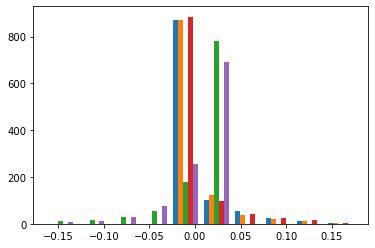

In [41]:
plt.hist(slnm_vals)

In [32]:
df=pd.concat((df,slnmvalues),axis=1)

df.to_csv('~/GIT/ENIGMA/data/Behaviour_Information_ALL_April7_2022_sorted_CST_12_ll_slnm.csv')

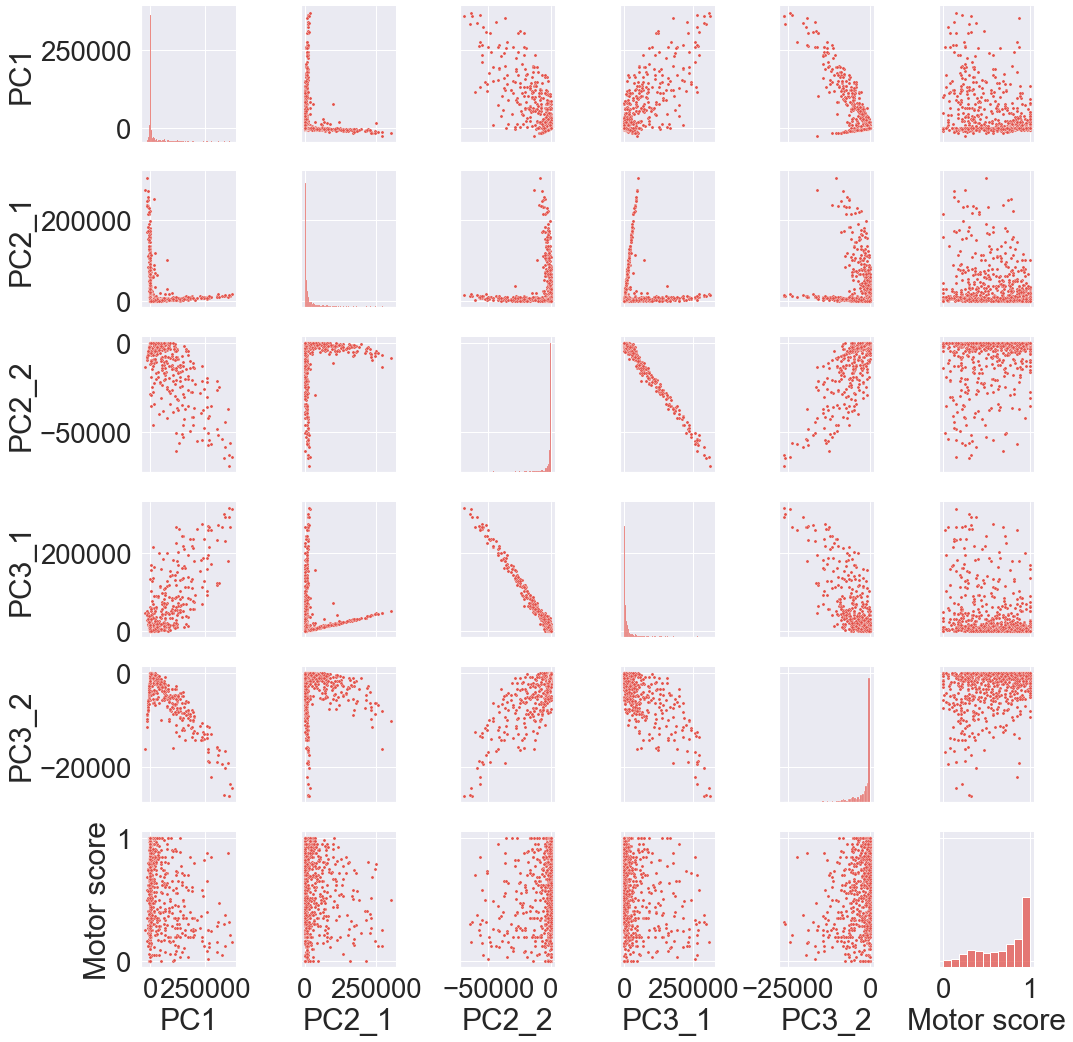

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
slnmvalues.to_csv('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/slnmvalues.csv')
sns.set(font_scale=2.5)
sns.set_palette('Spectral')
sns.pairplot(slnmvalues,plot_kws={"s": 10})
plt.savefig('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/slnmvalues_scatterplts.png')

{'whiskers': [<matplotlib.lines.Line2D at 0x157d7ba60>,
 'caps': [<matplotlib.lines.Line2D at 0x157d8b040>,
 'boxes': [<matplotlib.lines.Line2D at 0x157d7b790>,
 'medians': [<matplotlib.lines.Line2D at 0x157d8b5e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x157d8b8b0>,
 'means': []}

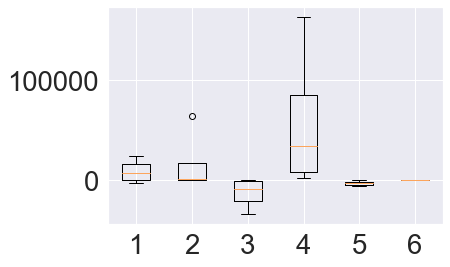

In [13]:
mean_LL = np.mean(slnmvalues.iloc[:,0:5],axis=0)

plt.boxplot(slnmvalues.iloc[0:4])
